In [3]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *

In [4]:
from scipy.io import loadmat
file_name = r'C:\Users\44788\Desktop\OctaveML\svhn_subset.mat'
mat_data = loadmat(file_name)

# Inspecting the Data

In [58]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
def convert_images(X, number_of_ims):
    New_X = []
    transpose = X.T
    for i in range(number_of_ims):
        im = (transpose[i][0] + transpose[i][1] + transpose[i][2])/3
        im = im/np.max(im)
        im = np.expand_dims(im, 2)
        New_X.append(list(im))
    array = np.array(New_X)
    arr = array.astype('float64') 
    return arr

In [6]:
new_X = convert_images(mat_data['X'], mat_data['X'].shape[3])
new_y = mat_data['y'].astype('float64')-1
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(new_X, new_y, test_size=0.1)

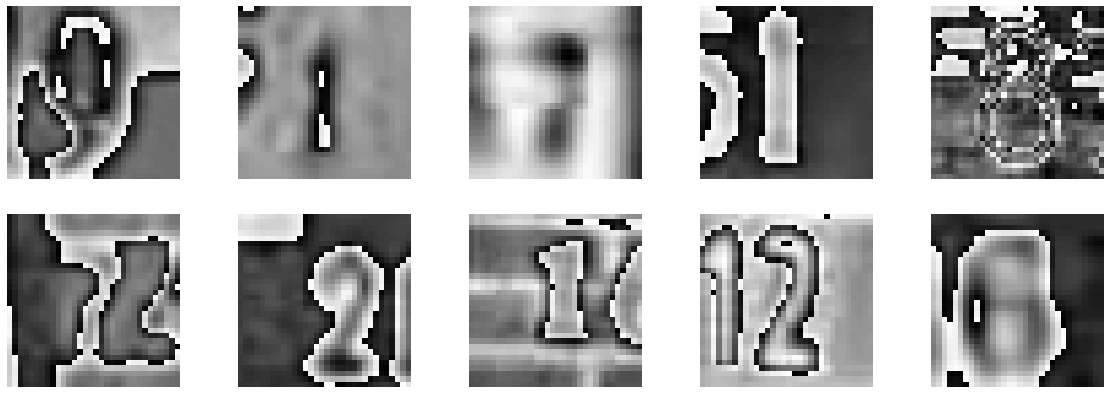

In [18]:
mylist = []
for i in range(0,10):
    x = random.randint(1,mat_data['X'].shape[3])
    mylist.append(x)
    
fig, ax = plt.subplots(2, 5, figsize=(20,7))
for i, num in enumerate(mylist):
    if i < 5:
        ax[0,i].set_axis_off()
        ax[0,i].imshow(np.reshape(new_X[num], (32,32)).T, cmap='gray')
    else:
        ax[1,i-5].set_axis_off()
        ax[1,i-5].imshow(np.reshape(new_X[num], (32,32)).T, cmap='gray')

# MLP neural network classifier

In [7]:
model = Sequential([
    Flatten(input_shape=(32,32,1), name='flatten'), #UTF8 data type shape cant be read
    Dense(64, activation='relu', name='dense1'),
    Dense(32, activation='relu', name='dense2'),
    Dense(10, activation='softmax', name='output')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                65600     
_________________________________________________________________
dense2 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = Adam(0.001)

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=0.001)

checkpoint_path = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/capstone.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_accuracy',
                            verbose=0)

In [30]:
history = model.fit(train_data,
         train_targets,
         epochs=30,
         batch_size=64,
         validation_data=(test_data, test_targets),
         callbacks=[early_stopping, checkpoint],
         verbose=0)

In [31]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [32]:
get_test_accuracy(model, train_data, train_targets)

accuracy: 0.195


<AxesSubplot:>

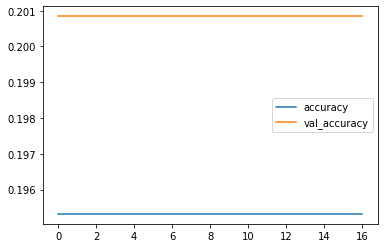

In [33]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

<AxesSubplot:>

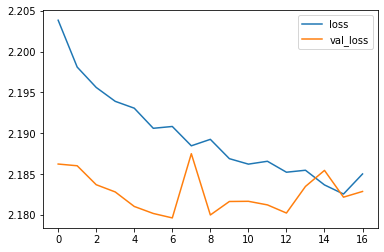

In [34]:
df.plot(y=['loss', 'val_loss'])

# Convolution network classifier

In [9]:
model2 = Sequential([
    Conv2D(16, (3,3), kernel_regularizer=l2(0.001), activation='relu', input_shape=(32,32,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32, kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

In [65]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [10]:
opt = Adam(0.001)

model2.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [67]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

checkpoint_path = r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/capstone2.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_accuracy',
                            verbose=0)

In [68]:
history = model2.fit(train_data,
         train_targets,
         epochs=30,
         batch_size=64,
         validation_data=(test_data, test_targets),
         callbacks=[early_stopping, checkpoint],
         verbose=0)

In [69]:
get_test_accuracy(model2, train_data, train_targets)

accuracy: 0.909


<AxesSubplot:>

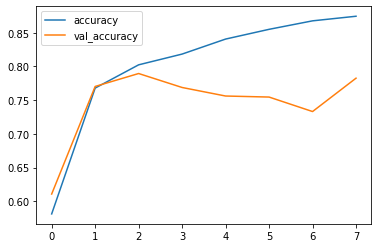

In [70]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

<AxesSubplot:>

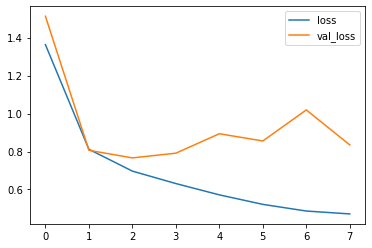

In [71]:
df.plot(y=['loss', 'val_loss'])

# Get model predictions

In [11]:
model.load_weights(r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/capstone.h5')
model2.load_weights(r'C:\Users\44788\Desktop\coding\pynbs\Tensorflow_specialization\getting_started/capstone2.h5')

image number 1 predictions: MLP predicition= 1 CNN predicition= 6
image number 2 predictions: MLP predicition= 1 CNN predicition= 7
image number 3 predictions: MLP predicition= 1 CNN predicition= 2
image number 4 predictions: MLP predicition= 1 CNN predicition= 7
image number 5 predictions: MLP predicition= 1 CNN predicition= 1


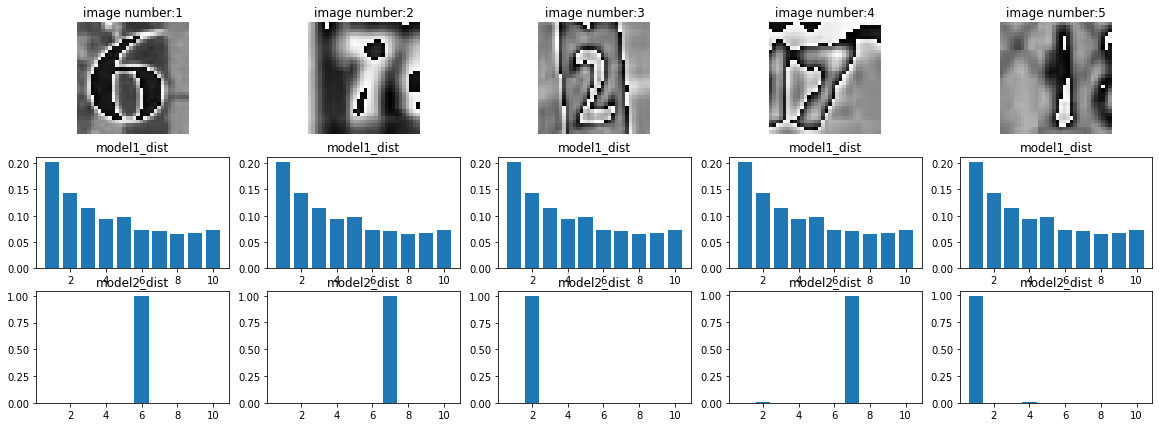

In [37]:
mylist = []
for i in range(0,5):
    x = random.randint(1,len(test_data))
    mylist.append(x)
    
fig, ax = plt.subplots(3, 5, figsize=(20,7))
for i, num in enumerate(mylist):
    ax[0,i].set_axis_off()
    ax[0,i].set_title('image number:'+ str(i+1))
    ax[0,i].imshow(np.reshape(test_data[num], (32,32)).T, cmap='gray')
    reshaped_image = np.reshape(test_data[num], (1,32,32,1))
    model1_dist = model.predict(reshaped_image)
    model2_dist = model2.predict(reshaped_image)
    model1_pred = np.argmax(model1_dist)+1
    model2_pred = np.argmax(model2_dist)+1
    print('image number', i+1, 'predictions: MLP predicition=', model1_pred, 'CNN predicition=', model2_pred)
    ax[1,i].set_title('model1_dist')
    ax[1,i].bar([1,2,3,4,5,6,7,8,9,10], np.reshape(model1_dist, (10)))
    ax[2,i].set_title('model2_dist')
    ax[2,i].bar([1,2,3,4,5,6,7,8,9,10], np.reshape(model2_dist, (10)))